In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, copy
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
df_house = pd.read_csv("Housing.csv")
df_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# X = df_house[['area']].to_numpy()
# y = df_house[['price']].to_numpy()

X = np.array(df_house['area'])
y = np.array(df_house['price'])

In [4]:
#we want prices in 1,00,000 of dollars and area in 1000 square feet
X_train = X/1000
y_train = y/100000

In [5]:
print(f'X type = {type(X_train)}, shape = {X_train.shape}')
print(f'y type = {type(y_train)}, shape = {y_train.shape}')

X type = <class 'numpy.ndarray'>, shape = (545,)
y type = <class 'numpy.ndarray'>, shape = (545,)


In [6]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = np.int64(0)

    for i in range(m):
        f_wb = w * X[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [7]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """

    #Number of training examples
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * X[i] + b
        dj_dw_i = (f_wb - y[i]) * X[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

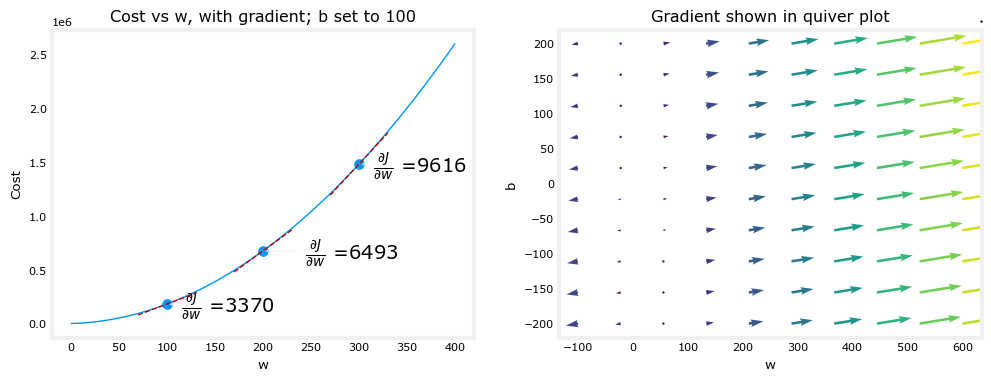

In [8]:
plt_gradients(X_train,y_train, compute_cost, compute_gradient)
plt.show()

In [9]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """

    #An array to store cost J and w's at each interval iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        #Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(X, y, w, b)

        #Update the parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
    
        #Save cost J at each iteration
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))
            p_history.append([w, b])
    
        #Print cost at every interval 10 times of as many iterations if i < 10
        if i%math.ceil(num_iters / 100) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]:0.2e}",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
                  f"w: {w: 0.3e}, b: {b: 0.5e}")

    return w, b, J_history, p_history

In [12]:
#Initalize parameters
w_init = 0
b_init = 0

#gradient settings
iterations = 100000
tmp_alpha = 1.0e-3

#run gradient descent
# gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
w_final, b_final, J_hist, p_hist = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration 0: Cost 1.24e+03 dj_dw: -2.672e+02, dj_db: -4.767e+01 w:  2.672e-01, b:  4.76673e-02
Iteration 1000: Cost 1.53e+02 dj_dw:  4.716e-01, dj_db: -2.846e+00 w:  7.838e+00, b:  4.45141e+00
Iteration 2000: Cost 1.46e+02 dj_dw:  4.073e-01, dj_db: -2.458e+00 w:  7.399e+00, b:  7.09868e+00
Iteration 3000: Cost 1.40e+02 dj_dw:  3.518e-01, dj_db: -2.123e+00 w:  7.020e+00, b:  9.38511e+00
Iteration 4000: Cost 1.36e+02 dj_dw:  3.039e-01, dj_db: -1.834e+00 w:  6.693e+00, b:  1.13599e+01
Iteration 5000: Cost 1.33e+02 dj_dw:  2.624e-01, dj_db: -1.584e+00 w:  6.411e+00, b:  1.30655e+01
Iteration 6000: Cost 1.31e+02 dj_dw:  2.267e-01, dj_db: -1.368e+00 w:  6.167e+00, b:  1.45386e+01
Iteration 7000: Cost 1.29e+02 dj_dw:  1.958e-01, dj_db: -1.181e+00 w:  5.956e+00, b:  1.58110e+01
Iteration 8000: Cost 1.28e+02 dj_dw:  1.691e-01, dj_db: -1.020e+00 w:  5.774e+00, b:  1.69099e+01
Iteration 9000: Cost 1.27e+02 dj_dw:  1.460e-01, dj_db: -8.813e-01 w:  5.616e+00, b:  1.78590e+01
Iteration 10000: Cost 1

OverflowError: Python int too large to convert to C long

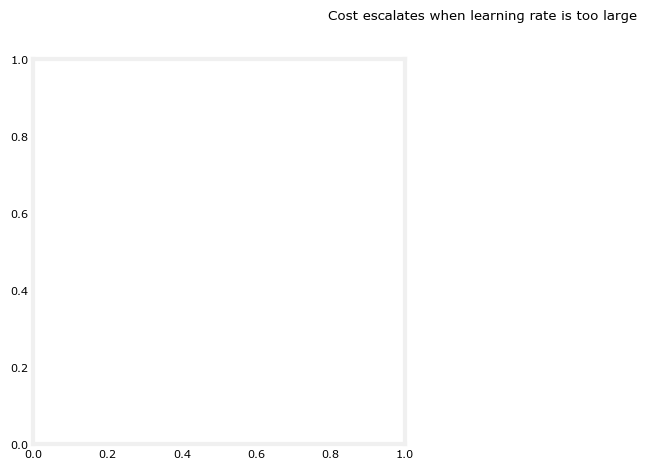

In [13]:
plt_divergence(p_hist, J_hist, X_train, y_train)
plt.show()

Text(0, 0.5, 'Cost')

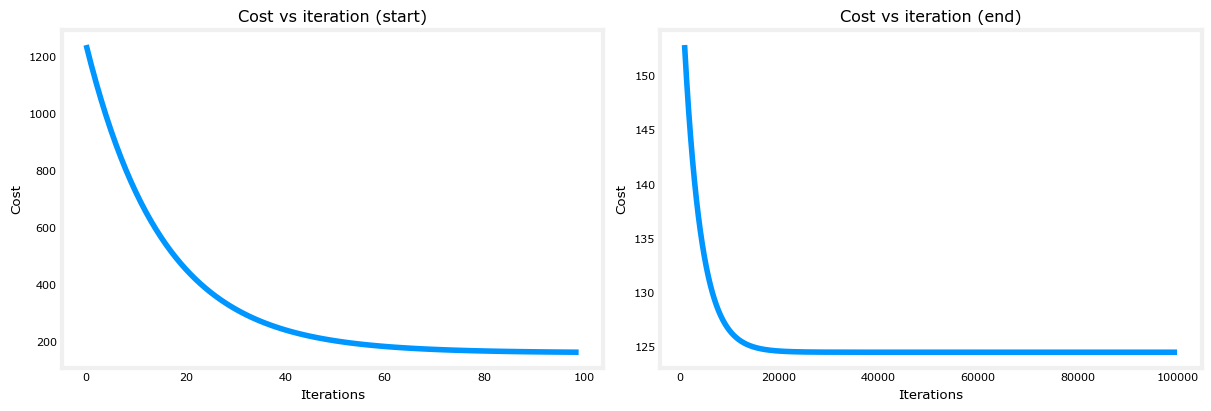

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title('Cost vs iteration (start)')
ax2.set_title('Cost vs iteration (end)')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
plt_contour_wgrad(X_train, y_train, p_hist, ax)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(X_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.9)

#### Setting a large learning rate

In [ ]:
# #initialize parameters
# w_init = 0
# b_init = 0
# iterations = 5
# alpha = 0.09
# w_final, b_final, J_hist, p_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

In [ ]:
# plt_divergence(p_hist, J_hist, X_train, y_train)
# plt.show()